<img style="float: left;;" src='../Imagenes/iteso.jpg' width="50" height="100"/></a>

# <center> <font color= #000047> Módulo III: Aprendizaje supervizado: Regresión Logística 

> La **regresión logística** es un método estadístico que trata de modelar la probabilidad de una variable cualitativa binaria (dos posibles valores) en función de una o más variables independientes. La principal aplicación de la regresión logística es la creación de modelos de clasificación binaria.

Se llama **regresión logística simple** cuando solo hay una variable independiente y **regresión logística múltiple*** cuando hay más de una. Dependiendo del contexto, a la variable modelada se le conoce como variable dependiente o variable respuesta, y a las variables independientes como **regresores, predictores o features**.

Si una variable cualitativa con dos niveles (binaría) se codifica como 0 y 1, matemáticamente es posible ajustar un modelo de regresión lineal por mínimos cuadrados. Sin embargo, esta aproximación tiene dos problemas:

- Al generar una recta (hiperplano si hay múltiples variables), se pueden obtener valores predichos distintos de 0 y 1, lo que entra en contradicción con la definición de la variable respuesta binaria.

- Si se quiere interpretar las predicciones del modelo como probabilidades de pertenencia a cada clase, no se cumpliría la condición de que toda probabilidad ha de estar dentro del intervalo [0,1], ya que podrían obtenerse valores fuera de este.

Para evitar estos problemas, la **regresión logística** transforma el valor devuelto por la regresión lineal con una función cuyo resultado siempre está comprendido entre 0 y 1 (función sigmoide). 

> Existen varias funciones que cumplen esta descripción, una de las más utilizadas es la función logística (también conocida como función sigmoide):

$$sigmoide = \sigma(y) = \frac{1}{1+e^{-y}}$$

<img style="float: center;;" src='../Imagenes/sigmoide.png' width="500" height="100"/></a>


> Para valores de $y$  positivos muy grandes,  $e^{−y}$  es aproximadamente 0, por lo que el valor de la función sigmoide es 1. Para valores de  $y$ negativos muy grandes,  $e^{−y}$  tiende a infinito, por lo que el valor de la función sigmoide es 0.

> Sustituyendo la  y  de la ecuación anterior por la función de un modelo lineal $y=\beta_0 + \beta_1 x_1 + ... + \beta_p x_p$ se obtiene que:

$$P(y=1|X=x) = \frac{e^{\beta_0 + \beta_1x_1 +...+\beta_px_p}}{1 + e^{\beta_0 + \beta_1x_1 +...+\beta_px_p}}$$

> donde $P(y=1|X=x)$ puede interpretarse como la probabilidad de que la variable respuesta  y  adquiera el valor 1 (clase de referencia), dado los predictores $x_1,...,x_p$. El modelo resultante tiene los coeficientes de regresión en los exponentes, por lo que no es un modelo lineal.

> La expresión obtenida tiene la característica de ser siempre positiva, ya que la función exponencial solo toma valores positivos y, el cociente de valores positivos, es siempre positivo. Esto hace posible aplicarle el logaritmo:

$$ln(\frac{P(y=1|X=x)}{P(y=0|X=x)}) = \beta_0 + \beta_1x_1 +...+\beta_px_p$$

> Al realizar la transformación, en el lado derecho se obtiene la ecuación de un modelo lineal. El término de la izquierda resulta ser el logaritmo de un cociente de probabilidades, lo que se conoce como razón de probabilidad (log of odds).

> Como resultado de este proceso se consigue convertir un problema de clasificación no lineal, en un problema de regresión lineal que sí puede ajustarse mediante los métodos convencionales.


### Función de Costo

$$J(\beta) = -\frac{1}{m} \sum_{i=1}^m[y^{(i)}\log\hat{y}(x^{(i)}) + (1-y^{(i)})\log(1 - \hat{y}(x^{(i)}))]$$

### Ejemplos:

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
import scipy.optimize as opt

In [3]:
# Generar un conjuto de datos para clasificación
X, Y = make_blobs(n_samples=200, centers = [[0,0], [3,3]], cluster_std = 0.5, n_features = 2) 


In [6]:
len(Y)

200

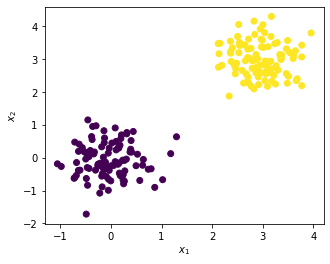

In [9]:
# Mostrar en una gráfica el conjunto de valores en X y su pertenencia a las clases 0 ó 1
plt.figure(figsize=(5,4))
plt.scatter(X[:,0], X[:,1], c = Y)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

In [10]:
# Programar la función logísitca (Sigmoide)
def fun_log(X):
    return 1/(1+np.exp(-X))

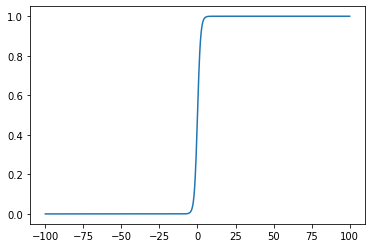

In [17]:
xi = np.linspace(-100,100,1000)
y_sigmoide = fun_log(xi)
plt.plot(xi,y_sigmoide )

In [31]:
#Función regresor logístico y_hat = fun_log(Beta^T*X)
def reg_log(Beta, X, Y):
    y_resgresor = np.matrix(X)*np.matrix(Beta).transpose()
    y_hat = np.array(fun_log(y_resgresor))[:,0] # Valores entre 0 y 1
    return y_hat

In [32]:
Y

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1])

In [39]:
#Función de costo de entropía
def fun_cost(Beta, X, Y):
    m = len(Y)
    yhat = reg_log(Beta, X, Y)
    J = (1/m)*np.sum(-Y*np.log(yhat) - (1-Y)*np.log(1-yhat))
    return J

In [40]:
np.ones((len(Y),1))

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [41]:
#Inicializar las variables para la optimización
# Xa = [1;X]
#Beta = [beta_0, beta_1, ..., beta_n]

Xa = np.append(np.ones((len(Y),1)), X, axis=1)
m,n = np.shape(Xa)
Beta = np.zeros(n)
Beta

array([0., 0., 0.])

In [42]:
Xa

array([[ 1.00000000e+00,  2.98948358e+00,  3.57264728e+00],
       [ 1.00000000e+00, -6.26993548e-01,  4.10986559e-01],
       [ 1.00000000e+00,  2.61981573e+00,  2.26725486e+00],
       [ 1.00000000e+00,  3.07748495e+00,  2.80780932e+00],
       [ 1.00000000e+00,  2.78918734e+00,  2.71709008e+00],
       [ 1.00000000e+00,  5.88605851e-03, -2.47549080e-01],
       [ 1.00000000e+00, -4.66586975e-02, -6.55778848e-01],
       [ 1.00000000e+00, -5.10228795e-02, -9.93052883e-01],
       [ 1.00000000e+00,  5.70589369e-01, -6.94569878e-01],
       [ 1.00000000e+00,  3.14328676e+00,  2.57974434e+00],
       [ 1.00000000e+00,  3.04939115e+00,  2.94255298e+00],
       [ 1.00000000e+00, -4.14438707e-01,  1.68484652e-01],
       [ 1.00000000e+00,  3.17423765e+00,  2.32590707e+00],
       [ 1.00000000e+00,  2.43676053e+00,  2.81646637e+00],
       [ 1.00000000e+00,  2.90042970e+00,  2.70194834e+00],
       [ 1.00000000e+00,  3.17311832e+00,  2.69729942e+00],
       [ 1.00000000e+00,  3.03600235e+00

In [43]:
Y

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1])

In [45]:
#Optimización para la regresión logística
res = opt.minimize(fun_cost, Beta, args=(Xa, Y))
res

C:\Users\uie70742\AppData\Local\Temp/ipykernel_45460/3281238034.py:5: RuntimeWarning: divide by zero encountered in log
  J = (1/m)*np.sum(-Y*np.log(yhat) - (1-Y)*np.log(1-yhat))
C:\Users\uie70742\AppData\Local\Temp/ipykernel_45460/3281238034.py:5: RuntimeWarning: invalid value encountered in multiply
  J = (1/m)*np.sum(-Y*np.log(yhat) - (1-Y)*np.log(1-yhat))
C:\Users\uie70742\AppData\Local\Temp/ipykernel_45460/1538973798.py:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\uie70742\AppData\Local\Temp/ipykernel_45460/3281238034.py:5: RuntimeWarning: divide by zero encountered in log
  J = (1/m)*np.sum(-Y*np.log(yhat) - (1-Y)*np.log(1-yhat))
C:\Users\uie70742\AppData\Local\Temp/ipykernel_45460/3281238034.py:5: RuntimeWarning: invalid value encountered in multiply
  J = (1/m)*np.sum(-Y*np.log(yhat) - (1-Y)*np.log(1-yhat))
C:\Users\uie70742\AppData\Local\Temp/ipykernel_45460/1538973798.py:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-

      fun: nan
 hess_inv: array([[1296726.36259352, -332521.47134807, -316696.18221321],
       [-332521.47134807,   85270.05826966,   81210.94618241],
       [-316696.18221321,   81210.94618241,   77346.96706343]])
      jac: array([nan, nan, nan])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 524
      nit: 20
     njev: 131
   status: 2
  success: False
        x: array([-8648.67725005,  2218.58242583,  2113.00854782])

In [47]:
Beta = res.x

In [48]:
#Simular la regresión logística obtenida
Y_pred = np.round(reg_log(Beta, Xa, Y))


C:\Users\uie70742\AppData\Local\Temp/ipykernel_45460/1538973798.py:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [49]:
Y_pred

array([1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1.])

In [50]:
Y

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1])

In [52]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score)

In [53]:
accuracy_score(Y_pred, Y)

1.0

In [54]:
precision_score(Y_pred, Y)

1.0

In [55]:
recall_score(Y_pred, Y)

1.0

In [ ]:
# Investigar las diferencias entre accuracy_score, precision_score, recall_score

In [57]:
#Graficar la linea de separación del conjunto de datos
x = np.arange(-3,5,0.01)
y = np.arange(-3,5,0.01)

Xm, Ym = np.meshgrid(x,y)
m,n = np.shape(Xm)

Xmr = np.reshape(Xm, (m*n,1))
Ymr = np.reshape(Ym, (m*n,1))

Xtmp = np.append(Xmr,Ymr, axis=1)
Xtmp = np.append(np.ones((len(Xmr),1)), Xtmp, axis=1)

Ytmp = np.round(reg_log(Beta, Xtmp, Xmr), 0)

Z = np.reshape(Ytmp, (m,n))

C:\Users\uie70742\AppData\Local\Temp/ipykernel_45460/1538973798.py:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [58]:
Z

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

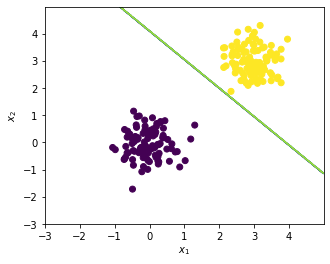

In [60]:
plt.figure(figsize=(5,4))
plt.scatter(X[:,0], X[:,1], c = Y_pred)
plt.contour(Xm,Ym,Z)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

### Utilizando Librerías

In [61]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import (accuracy_score, precision_score, recall_score)

In [62]:
#Crear un modelo de regresión logística
modelo = linear_model.LogisticRegression()
modelo.fit(X, Y)
Y_pred_sklearn = modelo.predict(X)


In [63]:
Y_pred_sklearn

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1])

In [64]:
accuracy_score(Y_pred_sklearn, Y)

1.0

In [66]:
#Graficar la linea de separación del conjunto de datos
x = np.arange(-3,5,0.01)
y = np.arange(-3,5,0.01)

Xm, Ym = np.meshgrid(x,y)
m,n = np.shape(Xm)

Xmr = np.reshape(Xm, (m*n,1))
Ymr = np.reshape(Ym, (m*n,1))

Xtmp = np.append(Xmr,Ymr, axis=1)
#Xtmp = np.append(np.ones((len(Xmr),1)), Xtmp, axis=1)

Ytmp = np.round(modelo.predict(Xtmp), 0)

Z = np.reshape(Ytmp, (m,n))

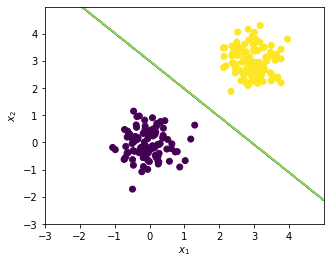

In [67]:
plt.figure(figsize=(5,4))
plt.scatter(X[:,0], X[:,1], c = Y_pred_sklearn)
plt.contour(Xm,Ym,Z)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

### Ejemplo Reg Logística Linealmente no Separable

In [99]:
#Importar los datos de ex2data2
data = pd.read_csv('../Data/ex2data2.txt',header=None)
data.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [100]:
data.columns= ['x1','x2','y']

In [101]:
data.head()

,x1,x2,y
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


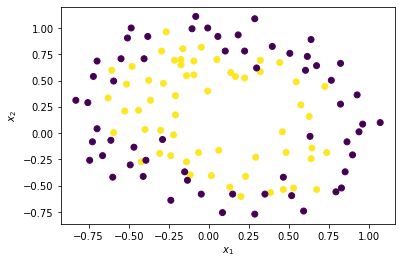

In [102]:
plt.figure(figsize=(6,4))
plt.scatter(data.loc[:,'x1'], data.loc[:,'x2'], c = data.loc[:,'y'])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

In [103]:
#Preparar los datos para crear un modelo polinomial logístico
X = data.iloc[:,:2]
Y = data.iloc[:,-1]


In [104]:
# Modelo polinomial apartir de polynomialFeatures
ngrado = 7
poly = PolynomialFeatures(ngrado)
Xa = poly.fit_transform(X)


In [105]:
# Crear el modelo de regresión logística
modelo = linear_model.LogisticRegression()
modelo.fit(Xa , Y)
Yhat_poly = modelo.predict(Xa)

In [106]:
Yhat_poly

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [107]:
#Evaluación del modelo
print(f'Presicion: {precision_score(Y,Yhat_poly)} ')
print(f'Recall: {recall_score(Y,Yhat_poly)} ')
print(f'Accuracy: {accuracy_score(Y,Yhat_poly)} ')

Presicion: 0.7794117647058824 
Recall: 0.9137931034482759 
Accuracy: 0.8305084745762712 


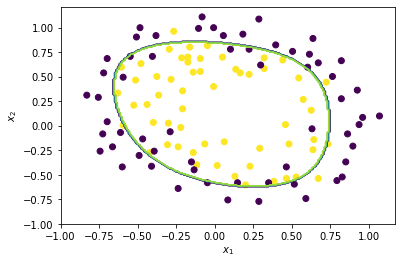

In [108]:
#Ploteo del contorno obtenido de la regresión logística
#xmin, xmax, ymin, ymax = X.values[0].min(), X.values[0].max(), X.values[1].min(), X.values[1].max()
xmin, xmax, ymin, ymax = -1,1,-1,1
xx, yy = np.meshgrid(np.arange(xmin,xmax,0.01), np.arange(ymin,ymax,0.01))

Xnew = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()])

Xa_new = poly.fit_transform(Xnew)
Z = modelo.predict(Xa_new)
Z = Z.reshape(xx.shape)

#Contorno obtenido por el modelo en función a los datos conocidos
plt.figure(figsize=(6,4))
plt.scatter(data.loc[:,'x1'], data.loc[:,'x2'], c = data.loc[:,'y'])
plt.contour(xx,yy,Z)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
#plt.xlim(xmin,xmax)
#plt.ylim(ymin,ymax)
plt.show()

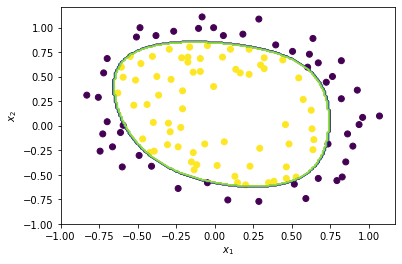

In [109]:
#Contorno obtenido por el modelo en función a los datos conocidos
plt.figure(figsize=(6,4))
plt.scatter(data.loc[:,'x1'], data.loc[:,'x2'], c = Yhat_poly)
plt.contour(xx,yy,Z)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
#plt.xlim(xmin,xmax)
#plt.ylim(ymin,ymax)
plt.show()

## Entrega de 2da parte del proyecto 29 de Noviembre